In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df = pd. read_csv(url)

df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
637,2014,LAND ROVER,LR4,SUV - STANDARD,3.0,6,AS8,Z,16.3,12.4,14.5,19,334
683,2014,LINCOLN,MKZ,MID-SIZE,2.0,4,AS6,X,10.5,7.1,9.0,31,207
1019,2014,VOLKSWAGEN,BEETLE,COMPACT,2.5,5,M5,X,11.2,7.7,9.6,29,221
874,2014,PORSCHE,911 CARRERA 4S CABRIOLET,MINICOMPACT,3.8,6,M7,Z,12.9,9.1,11.2,25,258
799,2014,MINI,COOPER S COUPE,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',], axis=1)

In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [9]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',], axis=1)

In [10]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


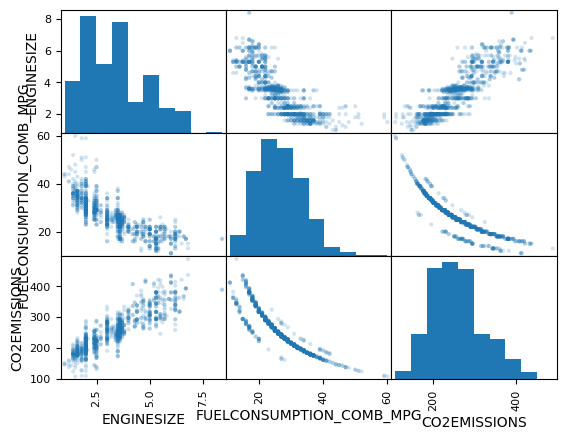

In [11]:
axes= pd.plotting.scatter_matrix(df, alpha=0.2)

In [12]:
X=df.iloc[:,[0,1]].to_numpy()
y=df.iloc[:,[2]].to_numpy()

In [13]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [14]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_std,y , test_size=0.2, random_state=42)

In [17]:
from sklearn import linear_model

regressor= linear_model.LinearRegression()

regressor.fit(X_train, y_train)

coef_ = regressor.coef_
intercept_= regressor.intercept_

print('Coefficients: ', coef_)
print('Intercept:', intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]


In [19]:
means_= std_scaler.mean_
std_devs= np.sqrt(std_scaler.var_)

coef_original = coef_/std_devs

intercept_original= intercept_ - np.sum((means_ * coef_)/ std_devs)

print('Coeffcients: ', coef_original)
print('Intercept', intercept_original)

Coeffcients:  [[17.8581369  -5.01502179]]
Intercept [329.1363967]


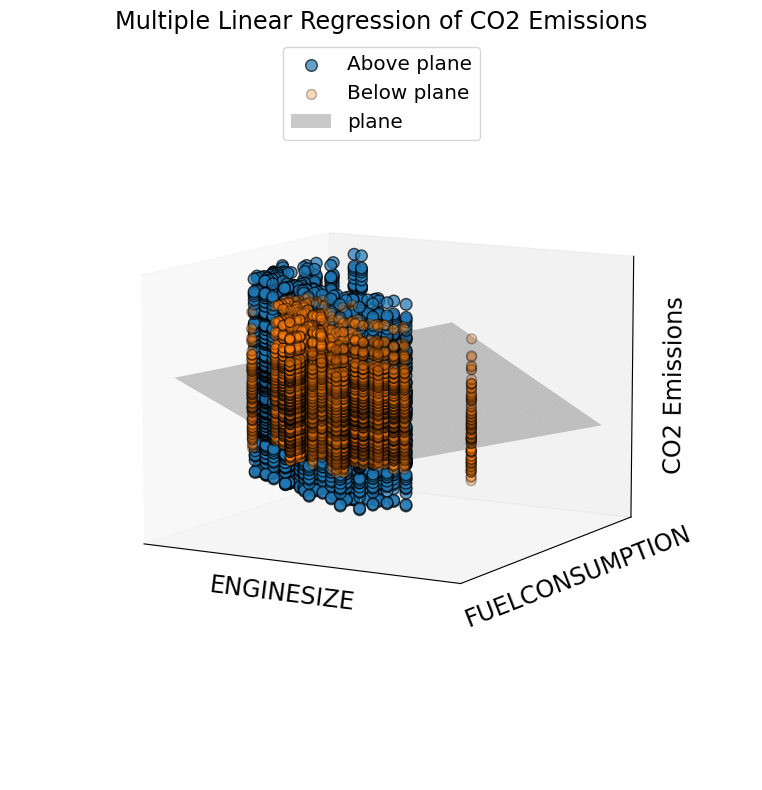

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(),100),
                               np.linspace(X2.min(),X2.max(),100))

y_surf = intercept_ + coef_[0,0] * x1_surf + coef_[0,1] * x2_surf

y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

fig= plt.figure(figsize=(20,8))
ax= fig.add_subplot(111, projection='3d')

ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label='Above plane', s=70, alpha=.7, ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label='Below plane', s=50, alpha=.3, ec='k')

ax.plot_surface(x1_surf,x2_surf, y_surf, color='k', alpha=0.21 , label='plane')


ax.view_init(elev=10)

ax.legend(fontsize= 'x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom= 0.75)
ax.set_xlabel('ENGINESIZE', fontsize= 'xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize= 'xx-large')
ax.set_zlabel('CO2 Emissions', fontsize= 'xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()

















Text(0, 0.5, 'Emission')

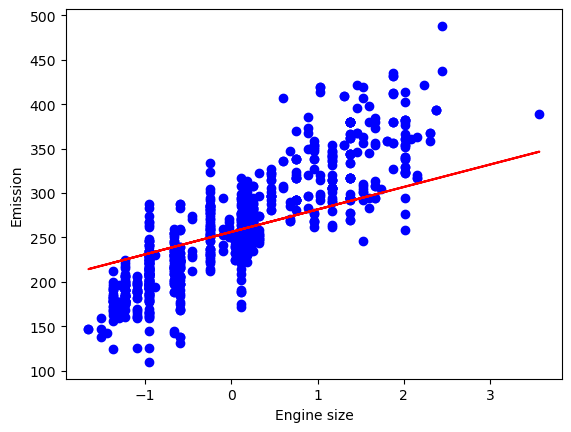

In [26]:
plt.scatter(X_train[:,0], y_train, color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], 'r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

Text(0, 0.5, 'Emission')

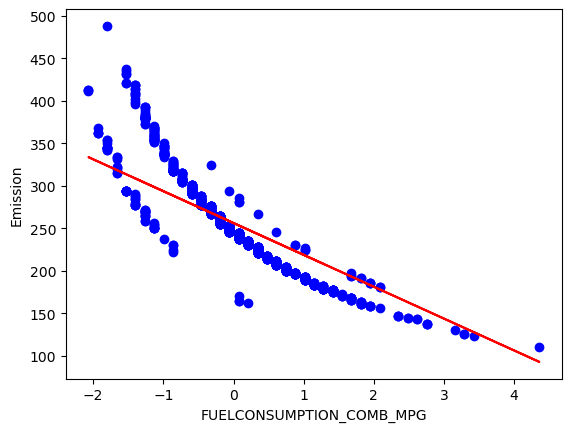

In [28]:
plt.scatter(X_train[:,1], y_train, color= 'blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:, 1] + intercept_[0], 'r')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('Emission')